# XGBOOST Model

## Dataset
This dataset usage for Kaggle InClass Competition Telecom Churn Analytics.

The dataset used of this coding,you can downloading in this link.

https://www.kaggle.com/c/churn-analytics-bda

In [1]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/8f/15/606f81a2b8a8e82eaa10683cb3f3074905ec65d3bcef949e3f0909f165a5/xgboost-0.80-py2.py3-none-manylinux1_x86_64.whl


###### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import warnings
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance 
from sklearn import cross_validation,metrics
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
from IPython.display import Image
from IPython.core.display import HTML 
import plotly as py
from matplotlib import pyplot

warnings.simplefilter("ignore")
%matplotlib inline

/home/leandro/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train = pd.read_csv('Datasets/churnTrain.csv')
test = pd.read_csv('Datasets/churnTest.csv')

In [4]:
# Adiciona coluna Churn no dataset de teste para poder fazer merge entre os dois.
test['Churn'] = 'TESTE'
dataframes = [train, test]
churnData = pd.concat(dataframes) 

#### Feature Engineering

N/A treatment, applied mean values in N/A columns.

In [5]:
churnData['Voice_Mail_Plan'].fillna(' no',inplace=True)
churnData['International_Plan'].fillna(' no',inplace=True)
churnData['Account_Length'].fillna(churnData['Account_Length'].mean(),inplace=True)
churnData['Total_Night_Minutes'].fillna(churnData['Total_Night_Minutes'].mean(),inplace=True)
churnData['Total_Intl_Calls'].fillna(churnData['Total_Intl_Calls'].mean(),inplace=True)
churnData['Total_Night_Charge'].fillna(churnData['Total_Night_Charge'].mean(),inplace=True)
churnData['Total_Night_Calls'].fillna(churnData['Total_Night_Calls'].mean(),inplace=True)
churnData['Total_Night_Minutes'].fillna(churnData['Total_Night_Minutes'].mean(),inplace=True)
churnData['Total_Eve_Charge'].fillna(churnData['Total_Eve_Charge'].mean(),inplace=True)
churnData['Total_Eve_Calls'].fillna(churnData['Total_Eve_Calls'].mean(),inplace=True)
churnData['Total_Eve_Minutes'].fillna(churnData['Total_Eve_Minutes'].mean(),inplace=True)
churnData['Total_Day_charge'].fillna(churnData['Total_Day_charge'].mean(),inplace=True)
churnData['Total_Day_Calls'].fillna(churnData['Total_Day_Calls'].mean(),inplace=True)
churnData['Total_Day_minutes'].fillna(churnData['Total_Day_minutes'].mean(),inplace=True)

In [6]:
churnData['Churn'] = churnData['Churn'].astype('category')
churnData['State'] = churnData['State'].astype('category')
churnData['Voice_Mail_Plan'] = churnData['Voice_Mail_Plan'].astype('category')
churnData['International_Plan'] = churnData['International_Plan'].astype('category')

churnData['Churn'] = churnData['Churn'].cat.codes
churnData['State_cat'] = churnData['State'].cat.codes

##### One Hot Enconding - OHE

In [7]:
cols_to_transform = ['International_Plan','Voice_Mail_Plan']
churnData = pd.get_dummies(churnData, columns=cols_to_transform)

##### Train and test Split

In [8]:
## Train and test separated again
churnData = churnData[['Account_Length','Area_Code','Phone_No','No_Vmail_Messages','Total_Day_minutes','Total_Day_Calls',
                      'Total_Day_charge','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls',
                      'Total_Intl_Charge','No_CS_Calls','State_cat','Voice_Mail_Plan_ no','Voice_Mail_Plan_ yes',
                       'International_Plan_ no','International_Plan_ yes','Churn']]


churnTrain = churnData.query('Churn!=2')
churnTest = churnData.query('Churn ==2')
churnTest.drop('Churn', axis=1)



Y = pd.factorize(churnTrain['Churn'].values)[0].reshape(-1,1)
X = churnTrain.drop('Churn',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [9]:
churnData.columns = ['Account_Length','Area_Code','Phone_No','No_Vmail_Messages','Total_Day_minutes','Total_Day_Calls',
                    'Total_Day_charge','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls',
                    'Total_Intl_Charge','No_CS_Calls','State_cat','Voice_Mail_Plan_no','Voice_Mail_Plan_yes',
                    'International_Plan_no','International_Plan_yes','Churn']

In [10]:
model_xgb = xgb.XGBClassifier(base_score=0.8
                              ,booster='gbtree'
                              ,colsample_bylevel=1
                              ,reg_alpha=1
                              ,reg_lambda=1
                              ,scale_pos_weight=2
                              ,max_depth=5
                              ,learning_rate=0.2
                              ,n_estimators=10000
                              ,gamma=0
                              ,max_delta_step=1
                              ,subsample=0.9
                              ,colsample_bytree=0.9
                              ,seed=0)

In [11]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_delta_step=1,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=2, seed=0, silent=True,
       subsample=0.9)

In [12]:
model_xgb.score(X_test,y_test)

0.9181818181818182

In [13]:
y_pred = model_xgb.predict(X_test)

##### Confusion Matrix 

In [14]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[914  26]
 [ 64  96]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       940
          1       0.79      0.60      0.68       160

avg / total       0.91      0.92      0.91      1100



##### ROC Curve

In [15]:
false_positive_rate, true_positive_rate,thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate,true_positive_rate)

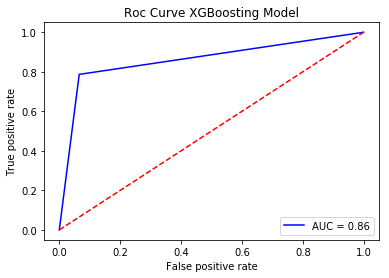

In [16]:
plt.title('Roc Curve XGBoosting Model')
plt.plot(false_positive_rate,true_positive_rate,'b', label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

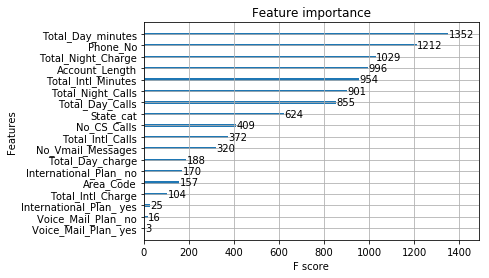

In [17]:
plot_importance(model_xgb)
pyplot.show()

##### Feature Importance in this model

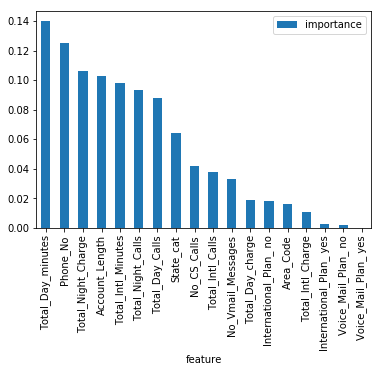

In [18]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model_xgb.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

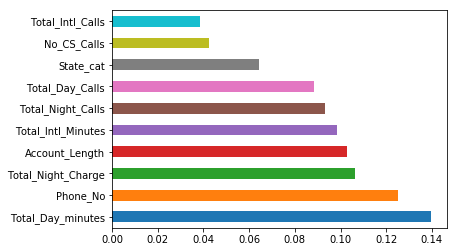

In [19]:
feat_importances = pd.Series(model_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')